In [33]:
import torch
from torch import nn
from torch.autograd import Variable

import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
%matplotlib inline
torch.manual_seed(1)    # reproducible

In [34]:
a = torch.Tensor( [[1],[2],[3]] )
b = torch.Tensor( [2,3])
print(a, b)


 1
 2
 3
[torch.FloatTensor of size 3x1]
 
 2
 3
[torch.FloatTensor of size 2]



Variable containing:
  3.3000
  4.4000
  5.5000
  6.7100
  6.9300
  4.1680
  9.7790
  6.1820
  7.5900
  2.1670
  7.0420
 10.7910
  5.3130
  7.9970
  3.1000
[torch.FloatTensor of size 15x1]
 Variable containing:
 1.7000
 2.7600
 2.0900
 3.1900
 1.6940
 1.5730
 3.3660
 2.5960
 2.5300
 1.2210
 2.8270
 3.4650
 1.6500
 2.9040
 1.3000
[torch.FloatTensor of size 15x1]



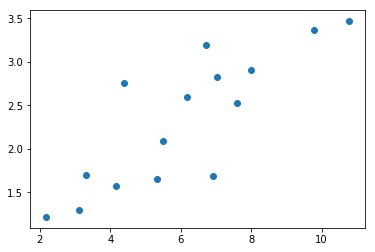

In [41]:
# X and Y training data

# x_train = torch.Tensor([[1], [2], [3]])
# y_train = torch.Tensor([[1], [2], [3]])


x_train = torch.Tensor([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]])

y_train = torch.Tensor([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]])


x, y = Variable(x_train), Variable(y_train)
print(x,y)
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [44]:
model = nn.Linear(1, 1, bias=True)    # Our Model XW+b
cost_func = nn.MSELoss()        # Our mean squared Cost function 

print(model)  # model
print('w:' , model.weight) 
print('b:', model.bias)

Linear (1 -> 1)
w: Parameter containing:
-0.9998
[torch.FloatTensor of size 1x1]

b: Parameter containing:
-0.7438
[torch.FloatTensor of size 1]



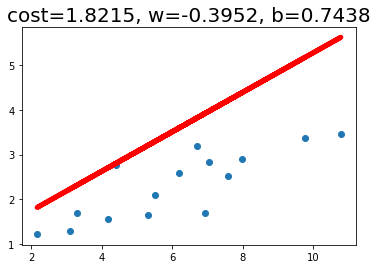

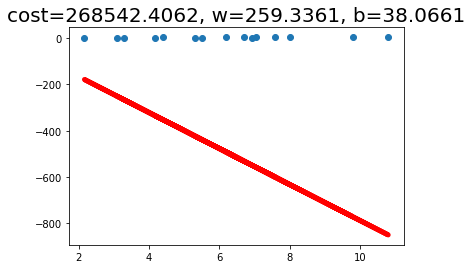

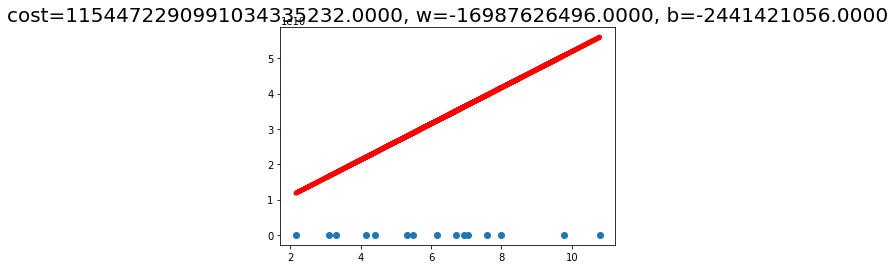

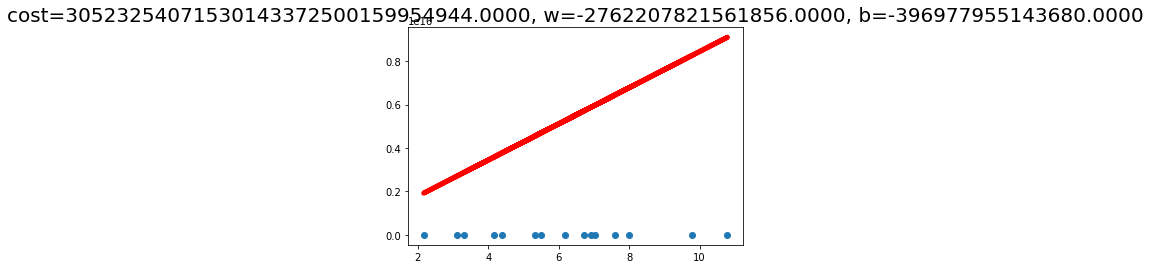

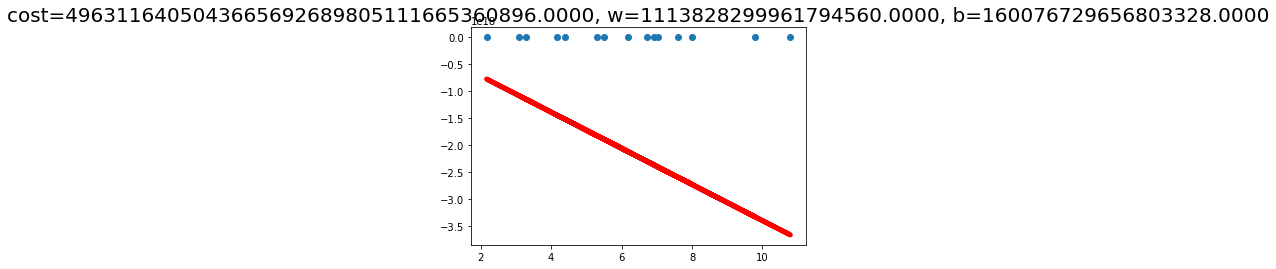

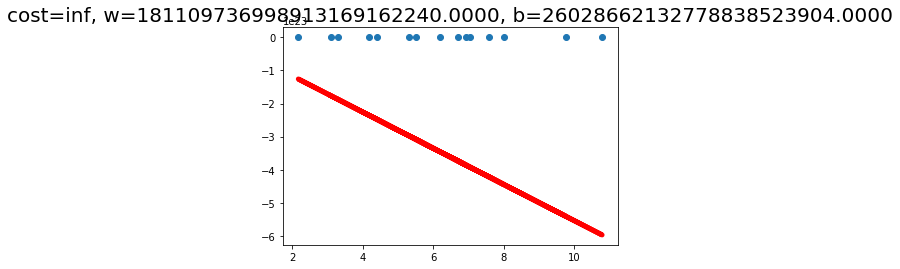

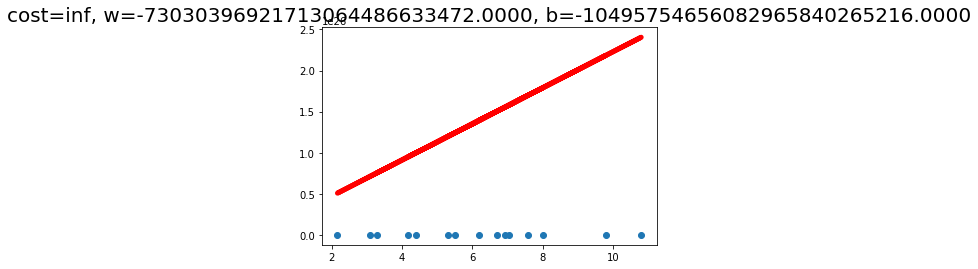

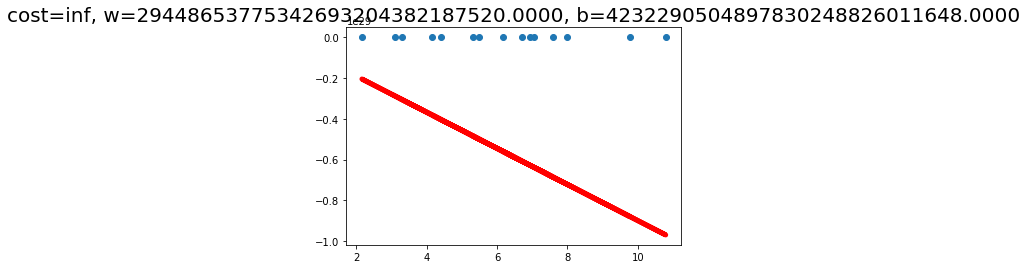

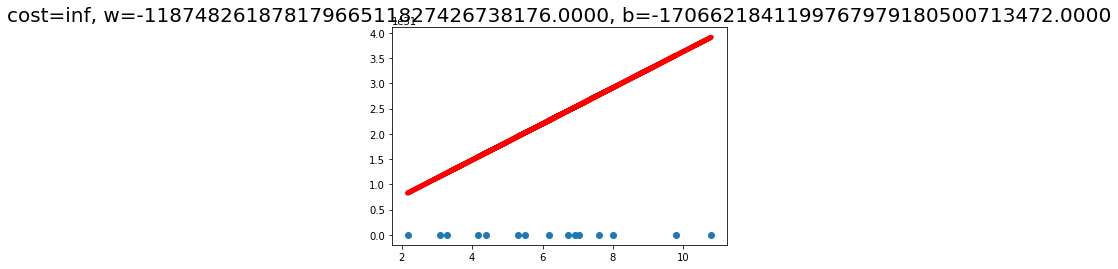

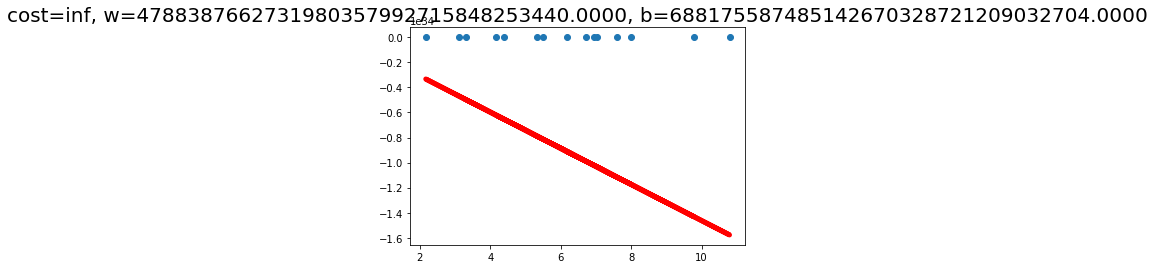

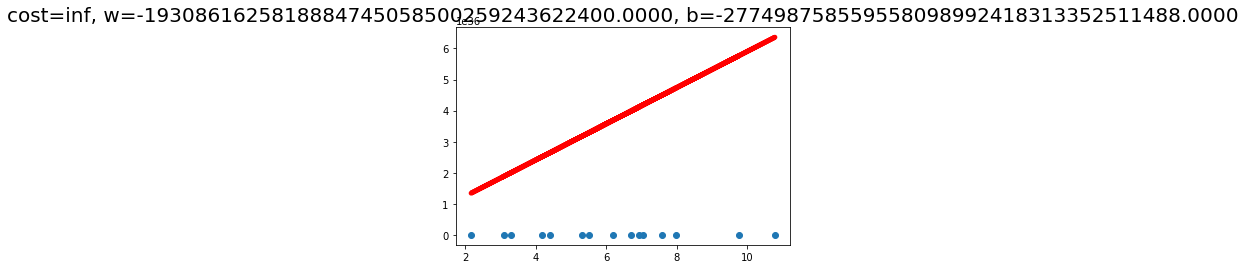

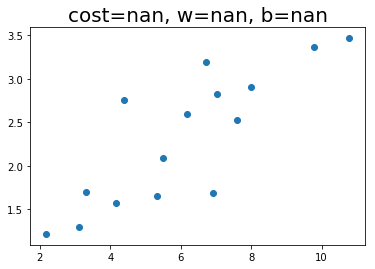

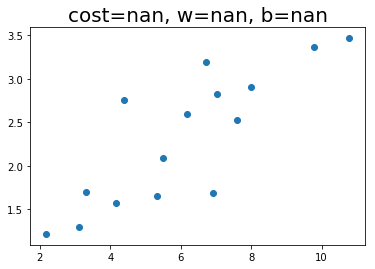

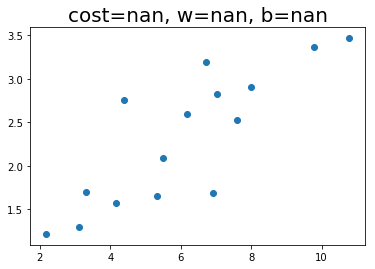

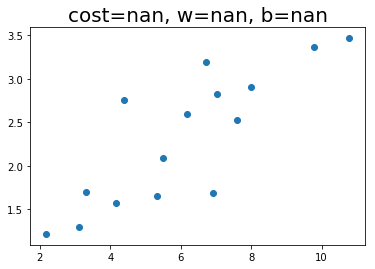

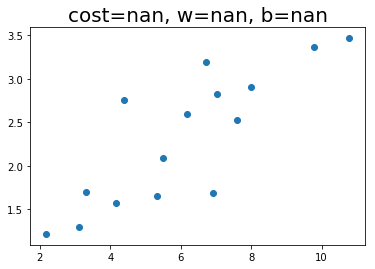

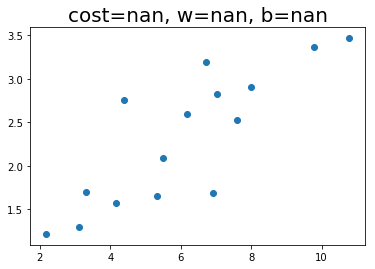

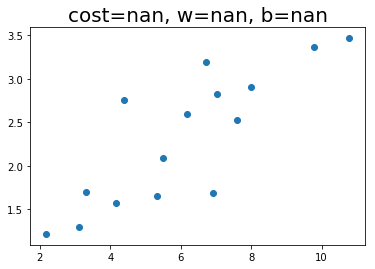

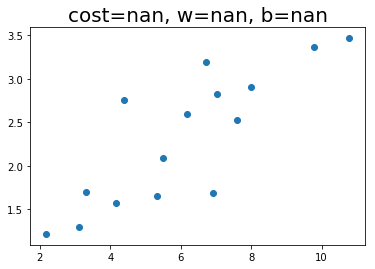

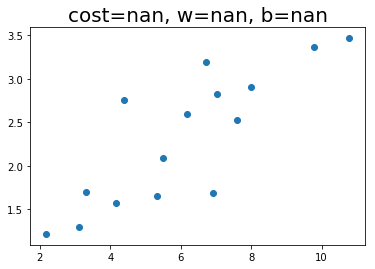

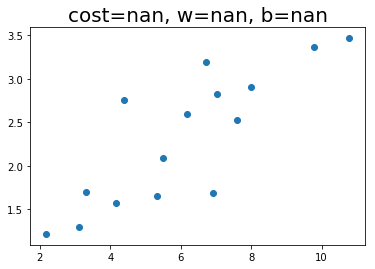

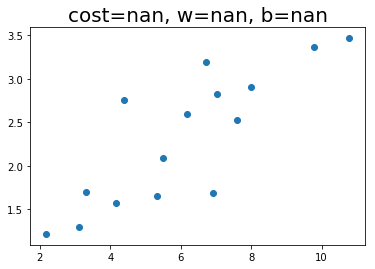

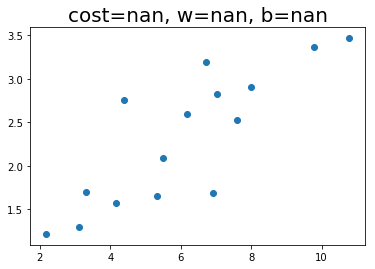

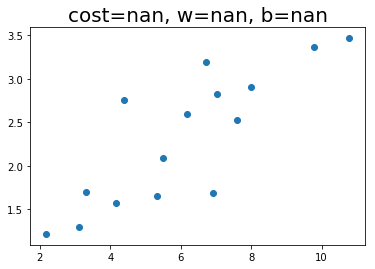

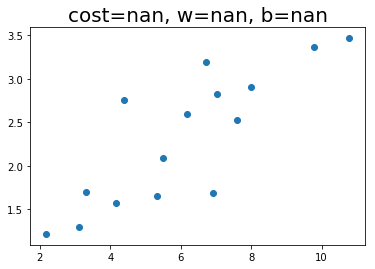

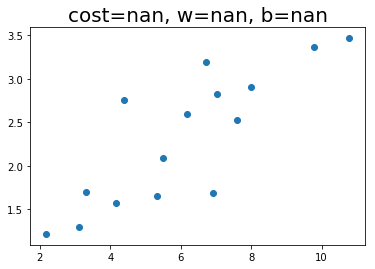

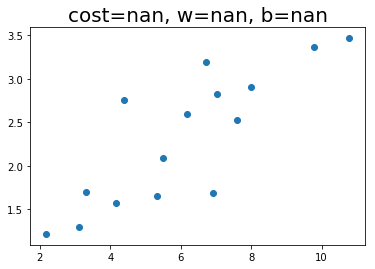

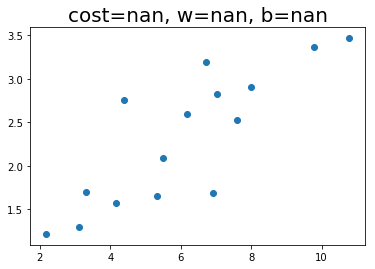

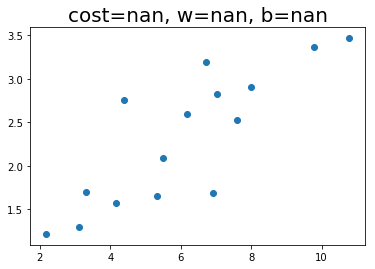

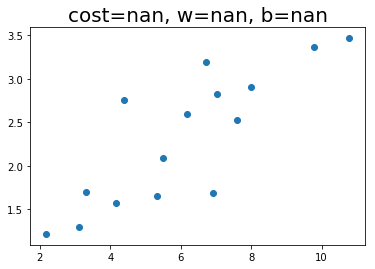

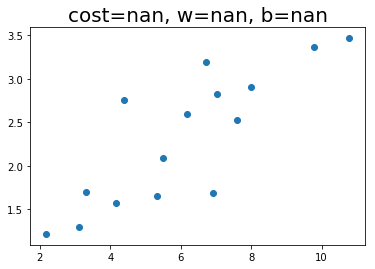

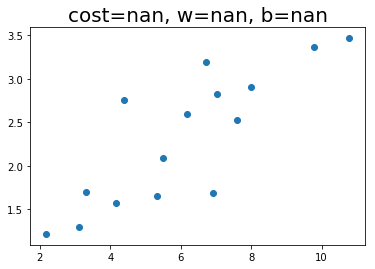

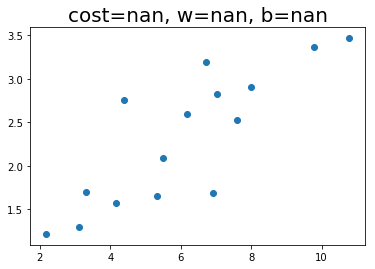

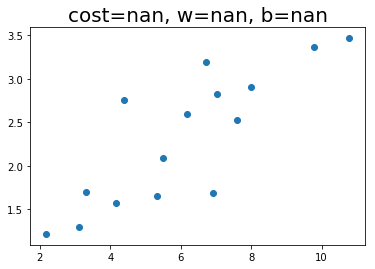

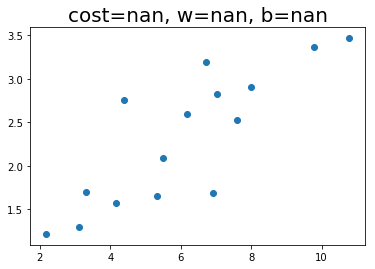

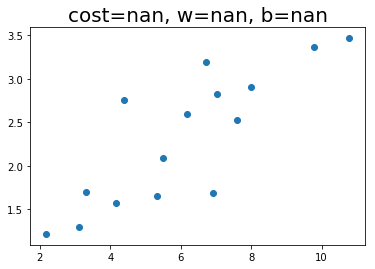

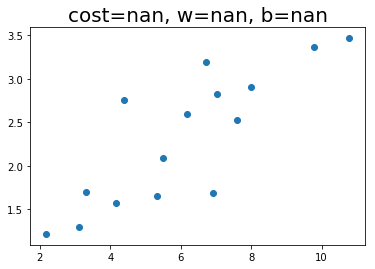

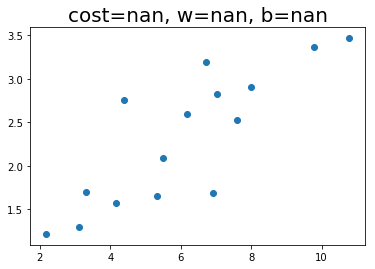

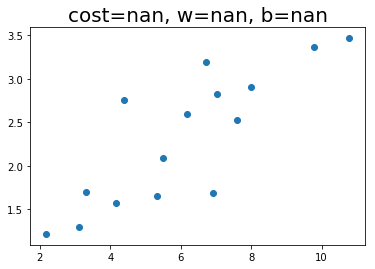

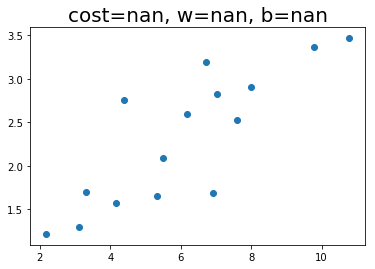

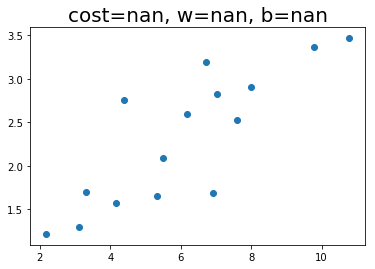

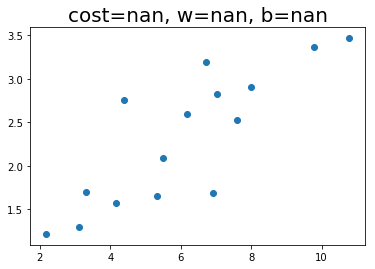

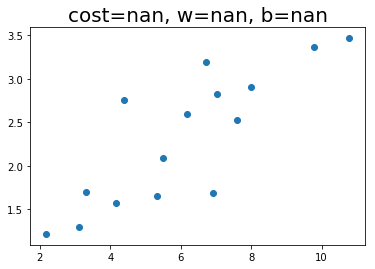

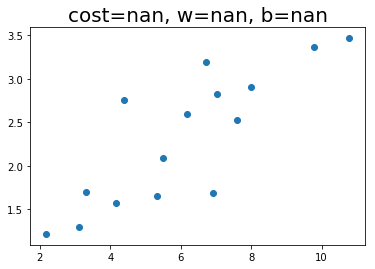

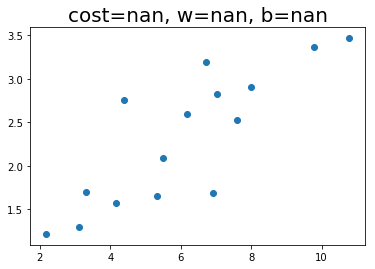

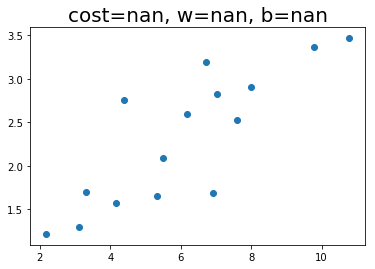

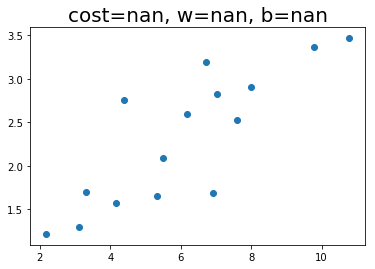

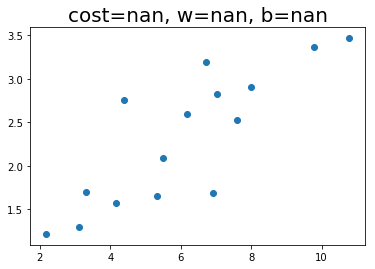

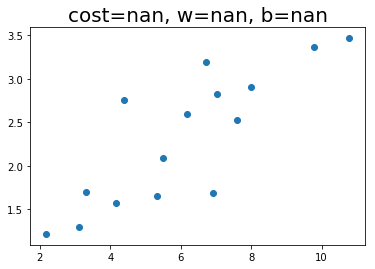

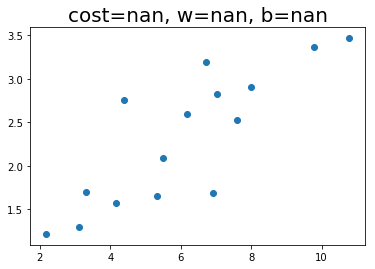

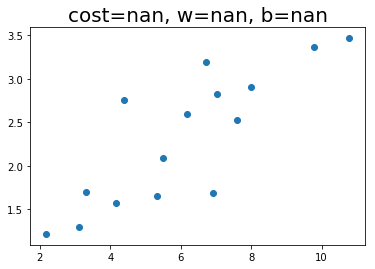

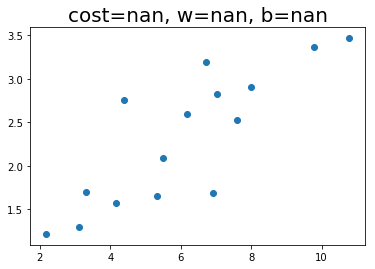

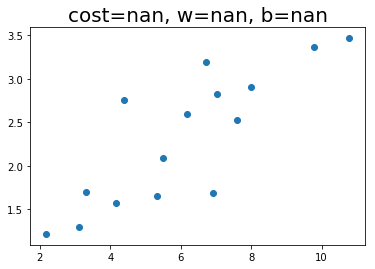

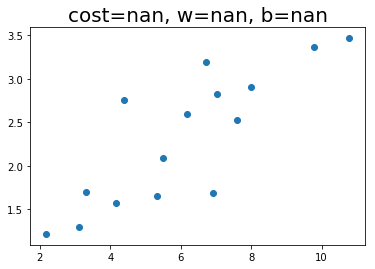

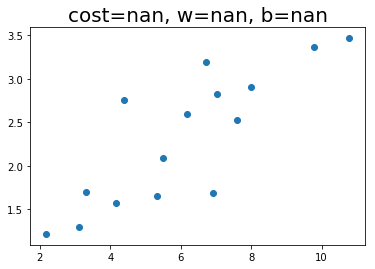

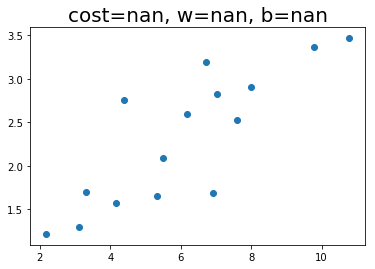

Linear Model Optimization is Done!


In [43]:
plt.ion()   # something about plotting

optimizer = torch.optim.SGD(model.parameters(), lr= 0.01 )

for step in range(300):
    
    prediction = model(x)               # input x and predict based on x
    cost = cost_func(prediction, y)     # must be (1. prediction, 2. training target y)

    optimizer.zero_grad()               # clear gradients for next traing
    cost.backward()                     # compute gradient value of parameters
    optimizer.step()                    # update gradients

    if step % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.title('cost=%.4f, w=%.4f, b=%.4f' % (cost.data[0], model.weight.data[0][0],model.bias.data[0]), fontdict={'size': 20} )
        plt.show()
        plt.pause(0.1)
        
print('Linear Model Optimization is Done!')

plt.ioff()

In [ ]:
x_test = Variable(torch.Tensor([[10]]))
y_test = model(x_test)

print('input: %.4f, output: %.4f' % (x_test.data[0][0], y_test.data[0][0]) )